In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from isaac.constants import FORCE_CLASS_COLS, MASS_CLASS_COLS, BASIC_TRAINING_COLS, PUCK_SQUARE_DISTANCES, PUCK_ANGLE_FEATURES
from isaac.training import evaluate_saved_model

In [3]:
from isaac.utils import get_cuda_device_if_available
device = get_cuda_device_if_available()
print(device)

cuda:0


In [4]:
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({'axes.labelsize': '22',
                     'xtick.labelsize':'18',
                     'ytick.labelsize': '18',
                     'legend.fontsize': '18',
                     'figure.figsize': (8, 8),
                     'font.size': 22})

def increase_linewidth(ax):
    plt.tight_layout()
    lines = ax.get_lines()
    for line in lines:
        line.set_linewidth(3)
    leg = ax.legend()
    leg_lines = leg.get_lines()
    plt.setp(leg_lines, linewidth=5)

In [5]:
directory = "final_choice_plots/"

In [6]:
question_type = "force"
force_stats = pd.read_hdf(directory+question_type+"_stats.h5")
question_type = "mass"
mass_stats = pd.read_hdf(directory+question_type+"_stats.h5")

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


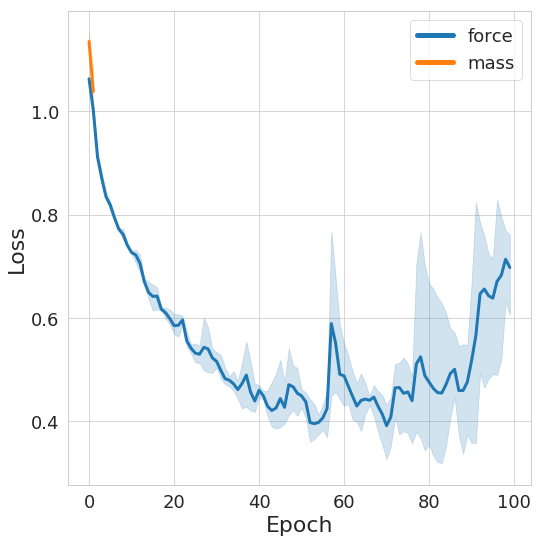

In [7]:
ax = sns.lineplot(x="Epoch", y="Loss", markers=True, data=force_stats, linewidth=3, label="force")
ax = sns.lineplot(x="Epoch", y="Loss", markers=True, data=mass_stats, linewidth=3, label="mass")
increase_linewidth(ax)
plt.savefig(directory+"losses.pdf")

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


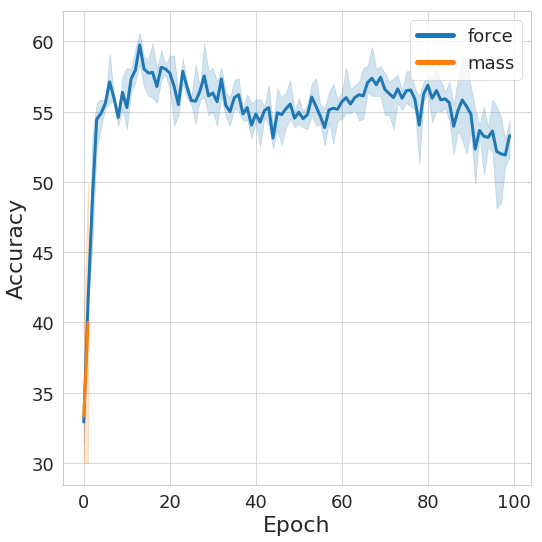

In [8]:
ax = sns.lineplot(x="Epoch", y="Val Accuracy", data=force_stats, label="force")
ax = sns.lineplot(x="Epoch", y="Val Accuracy", data=mass_stats, label="mass")
plt.legend()
plt.ylabel("Accuracy")
increase_linewidth(ax)
plt.savefig(directory+"accuracies.pdf")

In [9]:
sns.set_style("white")

100%|██████████| 1000/1000 [00:00<00:00, 1046.33it/s]


Model's accuracy on test set: 29.5
data/test_passive_trials.h5


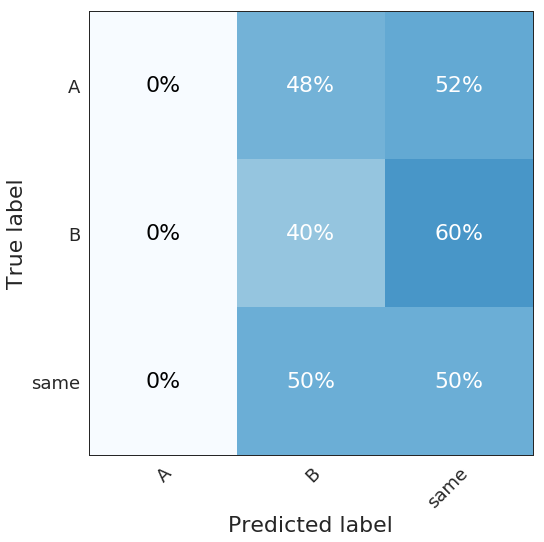

100%|██████████| 260/260 [00:00<00:00, 1046.04it/s]


Model's accuracy on test set: 33.84615384615385
data/passive_trials_exp1.h5


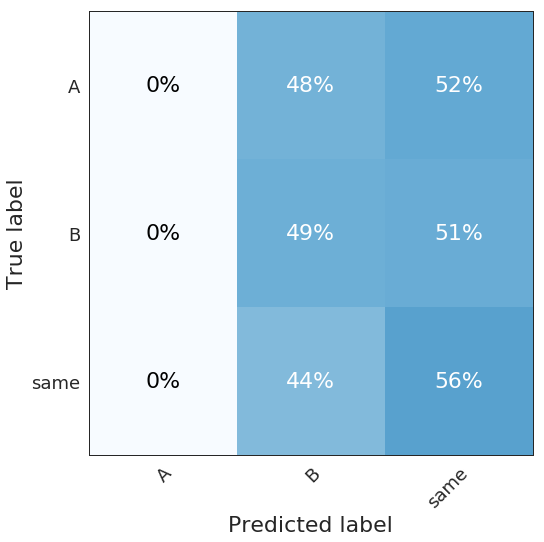

In [10]:
SEQ_END = 1800

if question_type == "force":    
    class_columns = FORCE_CLASS_COLS
    TR_COLS = BASIC_TRAINING_COLS + PUCK_SQUARE_DISTANCES + PUCK_ANGLE_FEATURES
    STEP_SIZE = 3
else:
    class_columns = MASS_CLASS_COLS
    TR_COLS = BASIC_TRAINING_COLS
    STEP_SIZE = 4
    
model_path = "models/passive_"+question_type+"_model.pt"
scaler_path = "scalers/passive_"+question_type+"_scaler.sk"
network_dims = (len(TR_COLS), 25, 4, 3, 0.5)
paths = ["final_choice_plots/test_data_"+question_type+"_cm.pdf",
         "final_choice_plots/neils_data_"+question_type+"_cm.pdf"]

for test_dataset_path, path in zip(["data/test_passive_trials.h5", "data/passive_trials_exp1.h5"],
                                               paths):
    ax = evaluate_saved_model(model_path, network_dims, test_dataset_path, TR_COLS,
                         class_columns, step_size=STEP_SIZE, seq_end=SEQ_END, scaler_path=scaler_path,
                         save_plot_path=path, device=device)
    print(test_dataset_path)
    plt.savefig(path)
    plt.show()